In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load the dataset:
df = pd.read_csv("C:/Users/aisat/Desktop/SAIT/406 - Data Analytics Capstone/Capstone_Project/HRDataset_v14_cleaned_Full.csv")

In [4]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   EmpStatusID                 311 non-null    int64  
 3   DeptID                      311 non-null    int64  
 4   PerfScoreID                 311 non-null    int64  
 5   Salary                      311 non-null    int64  
 6   Termd                       311 non-null    int64  
 7   PositionID                  311 non-null    int64  
 8   Position                    311 non-null    object 
 9   State                       311 non-null    object 
 10  Zip                         311 non-null    int64  
 11  DOB                         311 non-null    object 
 12  Sex                         311 non-null    object 
 13  MaritalDesc                 311 non

,Employee_Name,EmpID,EmpStatusID,DeptID,PerfScoreID,Salary,Termd,PositionID,Position,State,...,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,1,5,4,62506,0,19,Production Technician I,MA,...,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,42
1,"Ait Sidi, Karthikeyan",10084,5,3,3,104437,1,27,Sr. DBA,MA,...,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,50
2,"Akinkuolie, Sarah",10196,5,5,3,64955,1,20,Production Technician II,MA,...,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,36
3,"Alagbe,Trina",10088,1,5,3,64991,0,19,Production Technician I,MA,...,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,36
4,"Anderson, Carol",10069,5,5,3,50825,1,19,Production Technician I,MA,...,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,35


**1. Employee Turnover: What factors drive employees to leave?**

In [5]:
# Convert 'Termd' to integer
df['Termd'] = df['Termd'].astype(int)

In [6]:
# Drop Board of Directors and Executive Leadership from the Manager Name column
df = df[df['ManagerName'] != 'Board of Directors']
df = df[df['ManagerName'] != 'Executive Leadership']

In [7]:
# Stacked Bar Chart for Turnover by Department
turnover_dept = df.groupby(['Department', 'Termd']).size().unstack().reset_index()

# Sort by 'Terminated' (1) employees
turnover_dept = turnover_dept.sort_values(by=1, ascending=False)

# Create a stacked bar chart:
fig = px.bar(turnover_dept, x='Department', y=[0, 1], title="Employee Turnover by Department (Stacked Bar)",
             labels={'value': 'Number of Employees', 'variable': 'Terminated'})
fig.show()

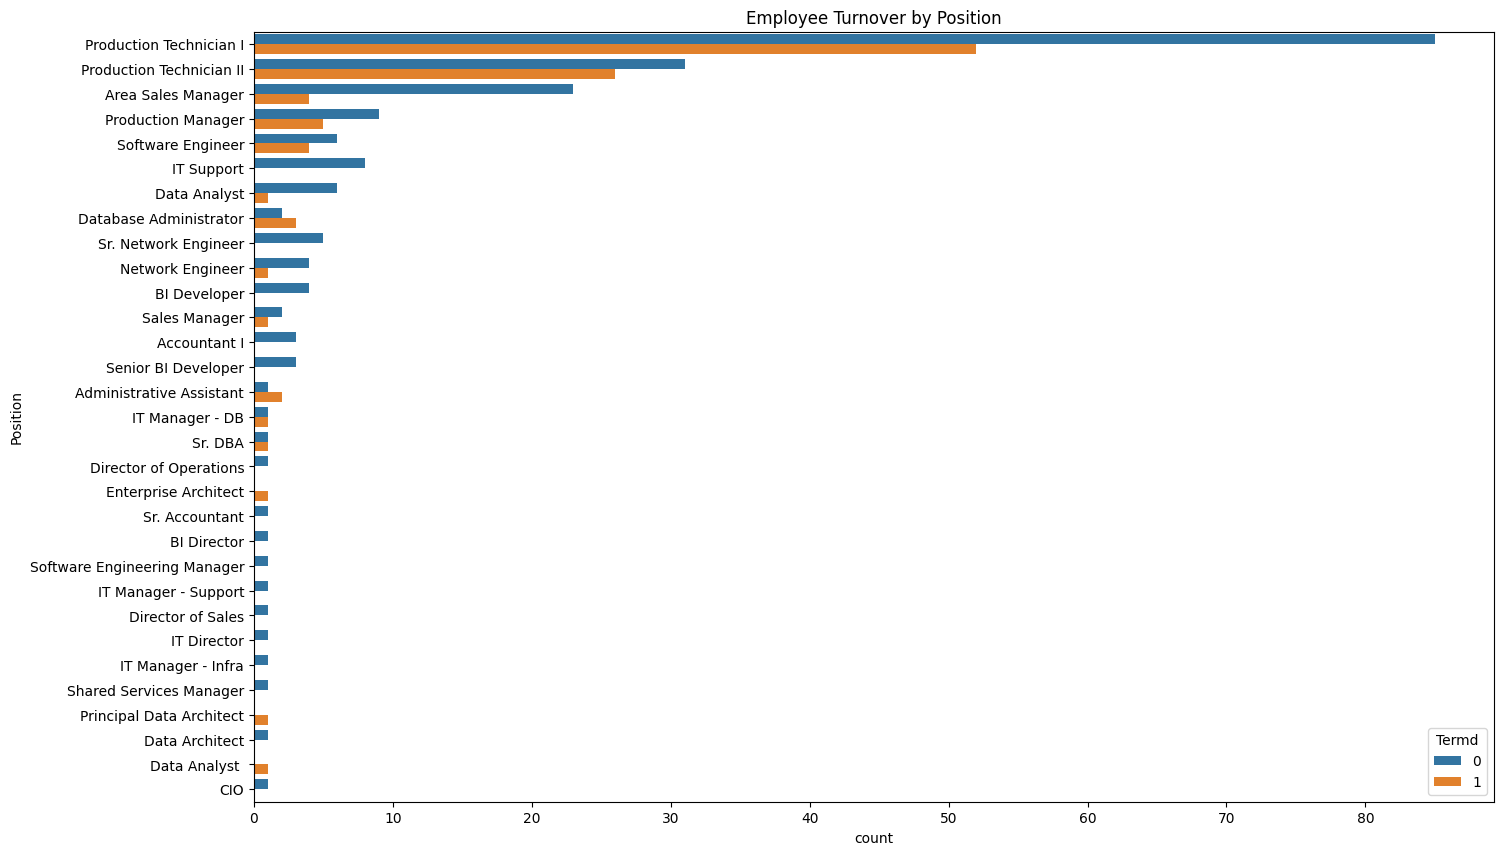

In [23]:
# Explore turnover by position
plt.figure(figsize=(16,10))
sns.countplot(y='Position', hue='Termd', data=df, order=df['Position'].value_counts().index)
plt.title("Employee Turnover by Position")
plt.show()

In [9]:
# Interactive Turnover Trend
turnover_trend = df.groupby('Department')['Termd'].sum().reset_index()

# Sort by 'Terminated' employees
turnover_trend = turnover_trend.sort_values(by='Termd', ascending=False)

# Create an interactive line chart:
fig = px.line(turnover_trend, x='Department', y='Termd', title="Turnover by Department (Interactive)")
fig.show()

In [10]:
# Area Chart for Turnover Trend by Department
turnover_trend = df.groupby(['Department', 'Termd']).size().unstack().reset_index()

# Sort by the total number of employees in each department
turnover_trend['Total'] = turnover_trend[0] + turnover_trend[1]
turnover_trend = turnover_trend.sort_values('Total', ascending=False).drop('Total', axis=1)

#Create the area chart:
fig = px.area(turnover_trend, x='Department', y=[0, 1], title="Turnover Trend by Department (Area Chart)",
              labels={'value': 'Number of Employees', 'variable': 'Terminated'})
fig.show()

In [11]:
# Stacked Bar Chart for Turnover by Position
turnover_position = df.groupby(['Position', 'Termd']).size().unstack().reset_index()

# Sort by total number of employees
turnover_position['Total'] = turnover_position[0] + turnover_position[1]
turnover_position = turnover_position.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Create the stacked bar chart:
fig = px.bar(turnover_position, x='Position', y=[0, 1], title="Employee Turnover by Position (Stacked Bar)",
             labels={'value': 'Number of Employees', 'variable': 'Terminated'})
fig.show()

**2. Recruitment Efficiency: Which hiring sources produce long tenured, high performing employees?**

In [12]:
# Calculate Tenure
df['Tenure'] = pd.to_datetime(df['DateofTermination']).dt.year - pd.to_datetime(df['DateofHire']).dt.year
df['Tenure'].fillna(2024 - pd.to_datetime(df['DateofHire']).dt.year, inplace=True)

C:\Users\aisat\AppData\Local\Temp\ipykernel_22952\2699843243.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
# Bar Chart for Average Tenure by Recruitment Source
tenure_by_source = df.groupby('RecruitmentSource')['Tenure'].mean().reset_index()

# sort the values
tenure_by_source = tenure_by_source.sort_values('Tenure', ascending=False)

# Create the bar chart
fig = px.bar(tenure_by_source, x='RecruitmentSource', y='Tenure', title="Average Tenure by Recruitment Source (Bar Chart)")
fig.show()

In [14]:
# Group data by RecruitmentSource and PerformanceScore, calculate mean Tenure
recruitment_trend = df.groupby(['RecruitmentSource', 'PerformanceScore'])['Tenure'].mean().reset_index()

# Sort the data by Tenure
recruitment_trend = recruitment_trend.sort_values(by='Tenure', ascending=False)

# Create the Area Chart
fig = px.area(recruitment_trend, 
              x='RecruitmentSource', 
              y='Tenure', 
              color='PerformanceScore', 
              title="Average Tenure by Recruitment Source and Performance Score (Area Chart)",
              labels={'Tenure': 'Average Tenure', 'PerformanceScore': 'Performance Score'})

fig.show()

In [15]:
# Stacked Bar Chart for Performance Score by Recruitment Source
performance_by_source = df.groupby(['RecruitmentSource', 'PerfScoreID']).size().unstack().reset_index()

# Sort by number of employees with top performance score
performance_by_source = performance_by_source.sort_values(by=4, ascending=False)

# Plot the stacked bar chart
fig = px.bar(performance_by_source, x='RecruitmentSource', y=[1, 2, 3, 4], title="Performance Score by Recruitment Source (Stacked Bar)",
             labels={'value': 'Number of Employees', 'variable': 'Performance Score'})
fig.show()

**3. Employee Absence Analysis: How does absence relate to satisfaction and performance?**

In [16]:
## Employee Absence Analysis
# Bar Chart for Average Absences by Performance Score
absence_by_performance = df.groupby('PerformanceScore')['Absences'].mean().reset_index()

# Create a bar chart:
fig = px.bar(absence_by_performance, x='PerformanceScore', y='Absences', title="Average Absences by Performance Score (Bar Chart)")
fig.show()

In [17]:
# Area Chart for Absence Trend by Satisfaction
absence_trend = df.groupby('EmpSatisfaction')['Absences'].mean().reset_index()

# Create a area chart:
fig = px.area(absence_trend, x='EmpSatisfaction', y='Absences', title="Average Absences by Satisfaction (Area Chart)")
fig.show()

**4. Leadership and Retention: How do managers impact performance?**

In [18]:
## Leadership and Retention Analysis

# Bar Chart for Average Performance by Manager
performance_by_manager = df.groupby('ManagerName')['PerfScoreID'].count().reset_index()

# Sort by Performance Score
performance_by_manager = performance_by_manager.sort_values('PerfScoreID', ascending=False)

# Create a bar chart:
fig = px.bar(performance_by_manager, x='ManagerName', y='PerfScoreID', title="Average Performance by Manager (Bar Chart)")
fig.show()

In [19]:
# Group by ManagerName and Termd, then unstack and reset the index
turnover_by_manager = df.groupby(['ManagerName', 'Termd']).size().unstack().reset_index()

# Calculate the total number of terminated employees
turnover_by_manager['Total_Terminated'] = turnover_by_manager[1]

# Sort by the total number of terminated employees in descending order
turnover_by_manager = turnover_by_manager.sort_values(by='Total_Terminated', ascending=False)

# Drop the temporary column used for sorting
turnover_by_manager = turnover_by_manager.drop(columns=['Total_Terminated'])

# Create the stacked bar chart:
fig = px.bar(turnover_by_manager, 
             x='ManagerName', 
             y=[0, 1], 
             title="Employee Turnover by Manager (Stacked Bar)", 
             labels={'value': 'Number of Employees', 'variable': 'Terminated'})
fig.show()


In [20]:
# Group by ManagerName and PerformanceScore Sorted by Count
grouped_data = df.groupby(['ManagerName','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['ManagerName','PerformanceScore','Count']

# Sort by Count
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'ManagerName', 
       y = 'Count', 
       color='PerformanceScore', 
       title = 'Employee Performance Scores Grouped by Managers, Sorted by Employee Count')

In [21]:
# Group by ManagerName and PerformanceScore Sorted by Performance Score
grouped_data = df.groupby(['ManagerName','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['ManagerName','PerformanceScore','Count']

# Sort by PerformanceScore
grouped_data = grouped_data.sort_values('PerformanceScore', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'ManagerName', 
       y = 'Count', 
       color='PerformanceScore', 
       title = 'Employee Performance Scores Grouped by Managers, Sorted by Performance Score')